In [10]:
import numpy as np
import pandas as pd

In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [35]:
# Vancouver 
vancouver_income = pd.read_csv('vancouver_turism_indicators.csv')

In [80]:
# employment by industry
vc_industry = pd.read_csv('vancouver_employment_by_industry.csv')

In [82]:
vc_year = vc_industry['year'].unique()
vc_industry['value'] = vc_industry['value'].ffill()

In [398]:
vc_employment = [vc_industry[vc_industry['industry_code']=='0']['value'].values]

In [410]:
d_emp = []
for i in range(len(vc_employment[0])):
    d_emp.append(vc_employment[0][i]/vc_employment[0][i-1] - 1)

In [393]:
vc_industry.head(10)

,year,industry_code,value
0,1987.0,0,1377700.0
1,1987.0,"11,21,22,23,31,32,33",333800.0
2,1987.0,"1100 1129, 1151 1152",31700.0
3,1987.0,1111 1119,15500.0
4,1987.0,1121 1129,14100.0
5,1987.0,1100,1600.0
6,1987.0,1151 1152,1600.0
7,1987.0,"1131 1142, 1153, 2100 2131",49500.0
8,1987.0,"1131 1133, 1153",24000.0
9,1987.0,1141 1142,6100.0


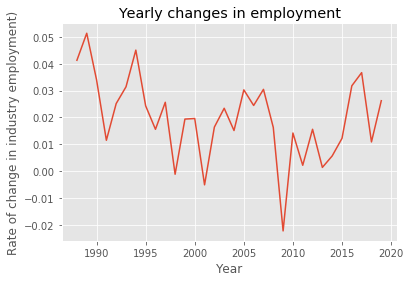

In [423]:
plt.plot(vc_year[1:], d_emp[1:])
plt.xlabel('Year')
plt.ylabel('Rate of change in industry employment)')
plt.title('Yearly changes in employment')
plt.show()

In [117]:
# Clean up Vancouver economic data
variables = ['revenue', 'GDP', 'real_GDP','wages_and_salaries', 'consumption_taxes', 'employment_vcm'
            , 'employment_vi', 'employment_to', 'employment_nbc', 'employment_bcr', 'employment_ccc']
for var in variables:
    for i in range(16):
        vancouver_income[var].iloc[i] = int(vancouver_income[var].iloc[i].replace(',', ''))

In [134]:
# Adjust revenues, wages/salaries, and consumption taxes for inflation
adjust = ['revenue', 'wages_and_salaries', 'consumption_taxes']
for adj in adjust:
    for i in range(16):
        vancouver_income[adj].iloc[i] = vancouver_income[adj].iloc[i]*(vancouver_income['implicit_price_index'].iloc[i]/100.0)

In [122]:
# Dictionary for variables
regions = {'employment_vcm': 'Vancouver: Coast and Mountains',
           'employment_vi': 'Vancouver Island',
           'employment_to': 'Thompson Okanagan',
           'employment_nbc': 'Northern British Columbia',
           'employment_bcr': 'British Columbia Rockies',
           'employment_ccc': 'Cariboo Chilcotin Coast'
    }

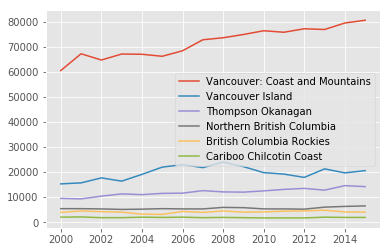

In [123]:
# Regional employment graphs
employment_vars = ['employment_vcm','employment_vi', 'employment_to', 'employment_nbc', 'employment_bcr', 'employment_ccc']
for emp in employment_vars:
    plt.plot(vancouver_income['year'], vancouver_income[emp], label=regions[emp])
plt.legend()    
plt.show()

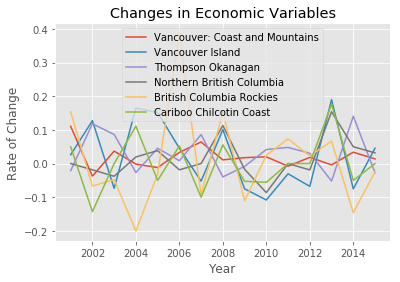

In [415]:
# Graph percentage changes in tourism employment
for emp in employment_vars:
    changes = []
    for i in range(1, 16):
        changes.append(vancouver_income[emp].iloc[i]/vancouver_income[emp].iloc[i-1] - 1)
    plt.plot(vancouver_income['year'][1:], changes, label=regions[emp])
    plt.xlabel('Year')
    plt.ylabel('Rate of Change')
    plt.title('Changes in Economic Variables')
plt.legend()
plt.show()

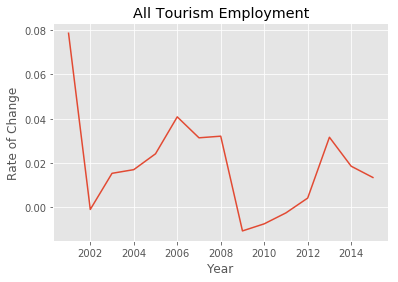

In [416]:
# Plot changes in total tourism
total_tourism = [vancouver_income['employment_vcm'].iloc[i] + vancouver_income['employment_vi'].iloc[i]+ 
                 vancouver_income['employment_to'].iloc[i] + vancouver_income['employment_nbc'].iloc[i]+ 
                 vancouver_income['employment_bcr'].iloc[i] + vancouver_income['employment_ccc'].iloc[i] 
                 for i in range(16)]
changes = [total_tourism[i]/total_tourism[i-1] - 1 for i in range(1,16)] 
plt.plot(vancouver_income['year'][1:], changes)
plt.xlabel('Year')
plt.ylabel('Rate of Change')
plt.title('All Tourism Employment')
plt.show()

In [443]:
AD(rel_data['value'])

(0.7169459345379837,
 0.9901700577336645,
 14,
 213,
 {'1%': -3.461429147102264,
  '5%': -2.875206950587861,
  '10%': -2.5740544497344002},
 4986.878303626473)

(-1.4258645487081425, 0.5698154537758475, 6, 9, {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}, -355.2876770228566)


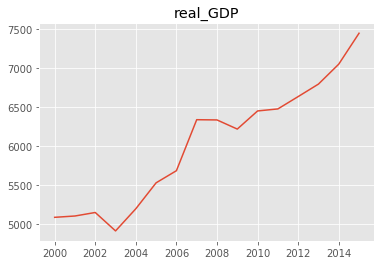

(0.0, 0.958532086060056, 8, 7, {'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}, -446.64387691744645)


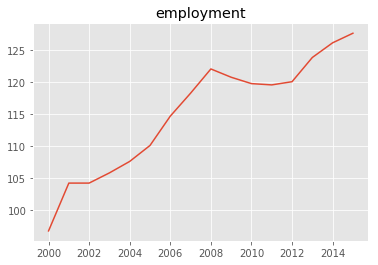

(19.758307423186434, 1.0, 6, 9, {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}, -346.29628620323393)


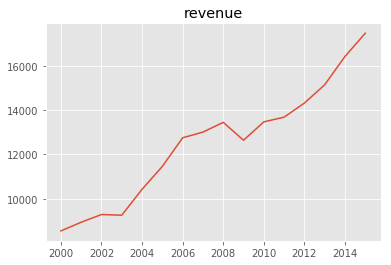

(1.182366640490624, 0.9958617601476247, 6, 9, {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}, -325.4999166230381)


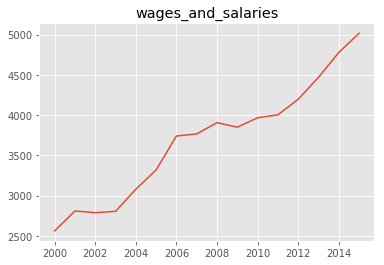

(0.0, 0.958532086060056, 8, 7, {'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}, -362.27106369444306)


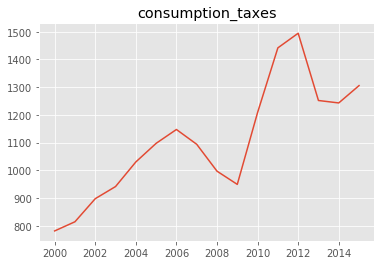

In [446]:
# Plot sales tax revenue
totals = ['real_GDP', 'employment','revenue', 'wages_and_salaries', 'consumption_taxes']
for tot in totals:
    plt.plot(vancouver_income['year'], vancouver_income[tot])
    print(AD(vancouver_income[tot]))
    plt.title(tot)
    plt.show()

In [142]:
vc_sb = pd.read_csv('vancouver_small_business_by_region.csv')

In [154]:
for i in range(84):
    vc_sb['value'].iloc[i] = int(vc_sb['value'].iloc[i].replace(',', ''))

In [144]:
vc_region_codes = pd.read_csv('region_codes.csv')

In [157]:
region_codes = vc_sb['region_code'].unique()

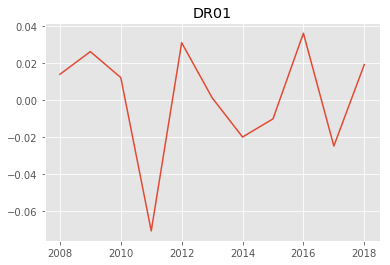

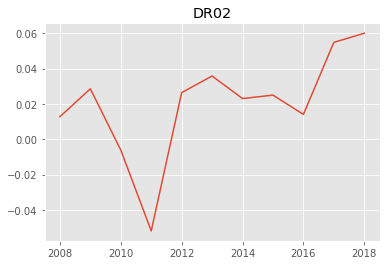

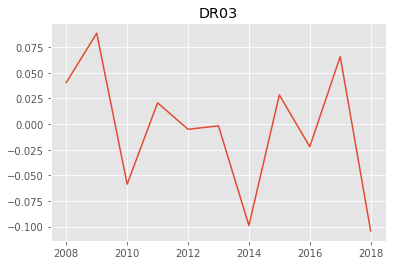

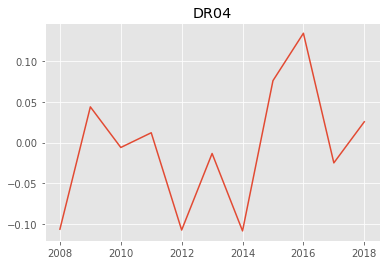

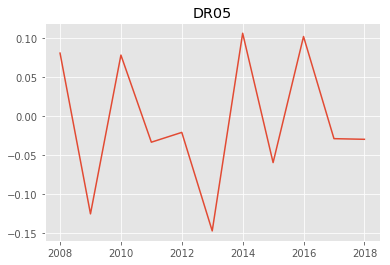

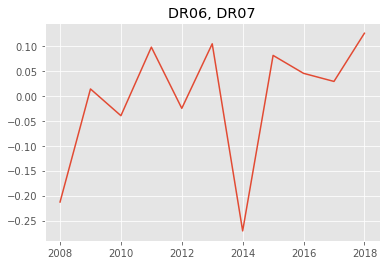

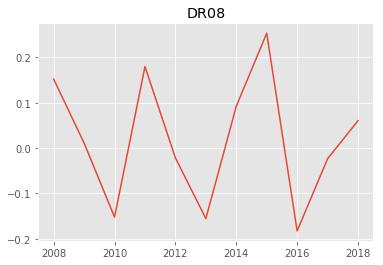

In [164]:
years = range(2007, 2019)
num_sbs = {'':''}
for rc in region_codes:
    vc_small = vc_sb[vc_sb['region_code']==rc]['value'].values
    num_sbs[rc] = vc_small
    changes = [vc_small[i]/vc_small[i-1] - 1 for i in range(1,12)] 
    plt.plot(years[1:], changes)
    plt.title(rc)
    plt.show()

In [166]:
vc_visitors = pd.read_csv('vancouver_visits.csv')

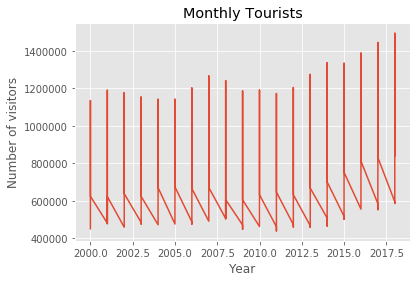

In [175]:
rel_data = vc_visitors[vc_visitors['year'] >= 2000]
plt.plot(rel_data['year'], rel_data['value'])
plt.xlabel('Year')
plt.ylabel('Number of visitors')
plt.title('Monthly Tourists')
plt.show()

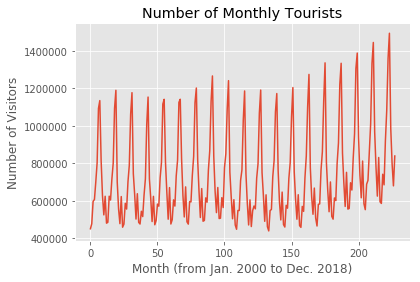

In [316]:
plt.plot(range(len(rel_data)), rel_data['value'])
plt.xlabel('Month (from Jan. 2000 to Dec. 2018)')
plt.ylabel('Number of Visitors')
plt.title('Number of Monthly Tourists')
plt.show()

In [434]:
chng = [rel_data['value'].values[i]/rel_data['value'].values[i-12] - 1 for i in range(12,len(rel_data['value']))]

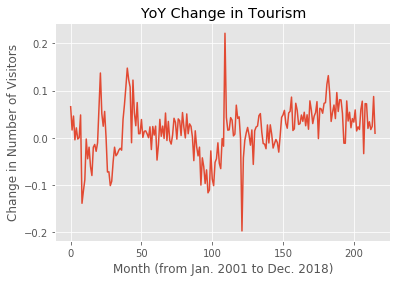

In [436]:
plt.plot(range(len(chng)), chng)
plt.xlabel('Month (from Jan. 2001 to Dec. 2018)')
plt.ylabel('Change in Number of Visitors')
plt.title('YoY Change in Tourism')
plt.show()

In [177]:
# Since we have seasonality in tourism numbers, we will use annual totals
tot_ann_tourists = [sum(rel_data[rel_data['year']==i]['value']) for i in range(2000, 2019)]

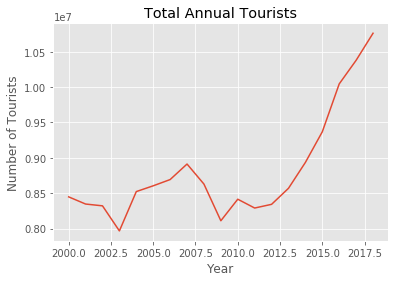

In [180]:
plt.plot(range(2000, 2019, 1), tot_ann_tourists)
plt.xlabel('Year')
plt.ylabel('Number of Tourists')
plt.title('Total Annual Tourists')
plt.show()

In [445]:
print(AD(tot_ann_tourists), AD(rel_data['value']))

(-0.0, 0.958532086060056, 8, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}, -276.0788999479998) (0.7169459345379837, 0.9901700577336645, 14, 213, {'1%': -3.461429147102264, '5%': -2.875206950587861, '10%': -2.5740544497344002}, 4986.878303626473)


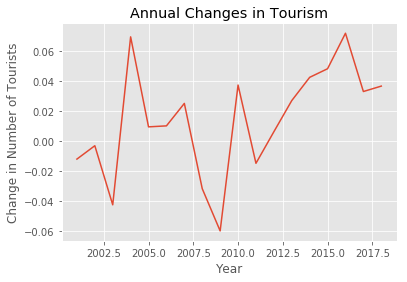

In [425]:
# Plot changes
changes = [tot_ann_tourists[i]/tot_ann_tourists[i-1] - 1 for i in range(1,19)] 
plt.plot(range(2001, 2019), changes)
plt.xlabel('Year')
plt.ylabel('Change in Number of Tourists')
plt.title('Annual Changes in Tourism')
plt.show()

In [ ]:
# Do a statistical test to show the difference (times series statistical tests?)

In [182]:
# Link tourism to certain outcomes: check room revenues
vc_rooms_10 = pd.read_csv('vancouver_room_revenues_2000_2010.csv')

In [185]:
vc_rooms_10 = vc_rooms_10[vc_rooms_10['acc_type']=='TOT']

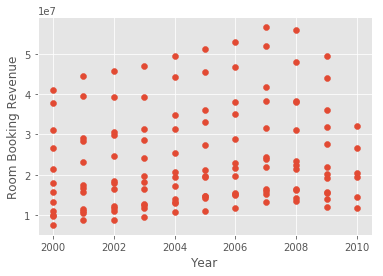

In [208]:
# Plot room bookings
plt.scatter(vc_rooms_10[vc_rooms_10['region_code']=='DR01']['year'], vc_rooms_10[vc_rooms_10['region_code']=='DR01']['revenue'])
plt.xlabel('Year')
plt.ylabel('Room Booking Revenue')
plt.show()

In [191]:
vc_rooms_20 = pd.read_csv('vancouver_room_revenues_2010_2019.csv')

In [420]:
vc_rooms_20

,year,month,region_code,region_name,revenue
0,2010.0,1.0,UC39,Campbell River,NaN
1,2010.0,2.0,UC39,Campbell River,NaN
2,2010.0,3.0,UC39,Campbell River,NaN
3,2010.0,4.0,UC39,Campbell River,NaN
4,2010.0,5.0,UC39,Campbell River,NaN
5,2010.0,6.0,UC39,Campbell River,NaN
6,2010.0,7.0,UC39,Campbell River,NaN
7,2010.0,8.0,UC39,Campbell River,NaN
8,2010.0,9.0,UC39,Campbell River,NaN
9,2010.0,10.0,UC39,Campbell River,NaN


In [193]:
# Plot tourism vs. room revenue for Vancouver
rel_data_10 = rel_data[rel_data['year'] <= 2010]

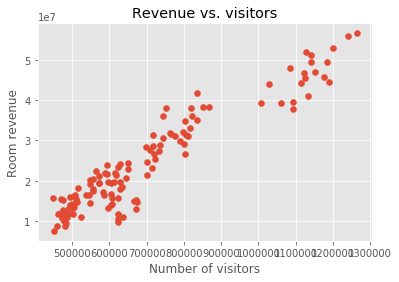

In [214]:
plt.scatter(rel_data_10['value'].values[:126], vc_rooms_10[vc_rooms_10['region_code']=='DR01']['revenue'])
plt.xlabel('Number of visitors')
plt.ylabel('Room revenue')
plt.title('Revenue vs. visitors')
plt.show()

In [217]:
# Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(rel_data_10['value'].values[:126].reshape(-1,1), 
                             vc_rooms_10[vc_rooms_10['region_code']=='DR01']['revenue'])
print(reg.score(rel_data_10['value'].values[:126].reshape(-1,1), vc_rooms_10[vc_rooms_10['region_code']=='DR01']['revenue']))
print(reg.coef_, reg.intercept_)

# We get an R^2 value of .89

0.8927551162524728
[53.7654367] -13145652.481414452


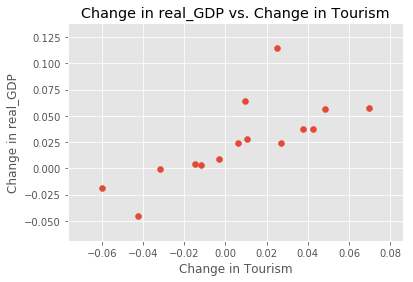

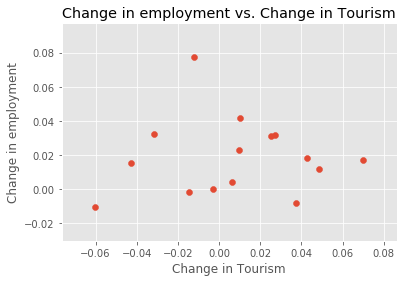

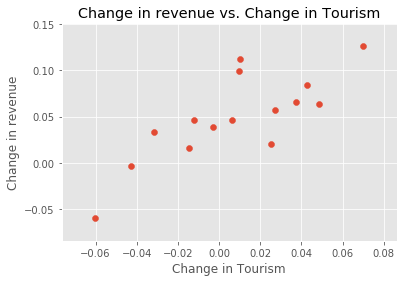

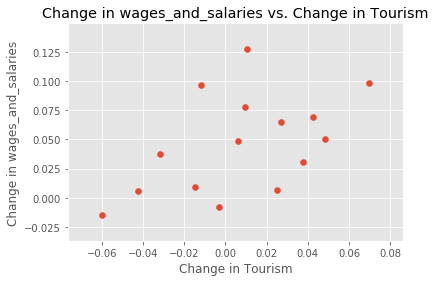

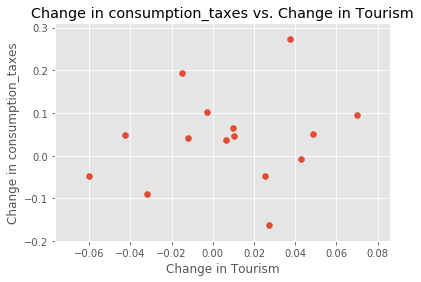

In [226]:
# Get changes in tourism 
totals = ['real_GDP', 'employment','revenue', 'wages_and_salaries', 'consumption_taxes']
for tot in totals:
    diff = [vancouver_income[tot].iloc[i]/vancouver_income[tot].iloc[i-1] - 1 for i in range(1,16)]
    plt.scatter(changes[:15], diff)
    plt.xlabel('Change in Tourism')
    plt.ylabel('Change in ' + tot)
    plt.title('Change in ' + tot + ' vs. Change in Tourism')
    plt.show()

In [233]:
for tot in totals:
    diff = [vancouver_income[tot].iloc[i]/vancouver_income[tot].iloc[i-1] - 1 for i in range(1,16)]
    reg = LinearRegression().fit(np.array(changes[:15]).reshape(-1,1), diff)
    print("R^2 for " + tot + ": )" + str(reg.score(np.array(changes[:15]).reshape(-1,1), diff)))
    print()

R^2 for real_GDP: )0.5529484405162801
R^2 for employment: )0.0019137247445131234
R^2 for revenue: )0.6149010419836605
R^2 for wages_and_salaries: )0.24519121848207018
R^2 for consumption_taxes: )0.03556594395098145


In [452]:
import statsmodels.api as sm
from scipy import stats
for tot in totals:
    diff = [vancouver_income[tot].iloc[i]/vancouver_income[tot].iloc[i-1] - 1 for i in range(1,16)]
    X2 = sm.add_constant(np.array(changes[:15]).reshape(-1,1))
    lm = sm.OLS(diff, X2)
    res = lm.fit()
    print(tot)
    print(res.summary())

real_GDP
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     16.08
Date:                Sat, 18 Jul 2020   Prob (F-statistic):            0.00148
Time:                        23:30:43   Log-Likelihood:                 34.157
No. Observations:                  15   AIC:                            -64.31
Df Residuals:                      13   BIC:                            -62.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0204      0.007      2.896

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [357]:
industries = vc_industry['industry_code'].unique()

In [361]:
ind_emp = {'':''}

In [362]:
for ind in industries:
    ind_emp[ind] = vc_industry[vc_industry['industry_code']==ind]['value']

In [381]:
sec_name = {'0':'Total', '11,21,22,23,31,32,33':'Good-producing sector', '1100  1129, 1151  1152':'Agriculture', 
         '1131  1142, 1153, 2100  2131':'Forestry/fishing/mining/gas', '2211  2213':'Utilities',
           '2361  2389':'Construction', '3111  3399':'Manufacturing', '41 & over':'Services-Prouducing Sector', 
         '4111  4543':'Trade', '4811  4931':'Transportation/Warehousing', '5211  5331':'Finance/Inusrance/Real Estate',
         '5411  5419':'Professional/Scientific','5511  5629':'Business/Building/Support Services', 
         '6111  6117':'Educational Services', '6211  6244':'Health Care/Social Assistance', 
         '5111  5191, 7111  7139':'Information/Culture/Recreation', '7211  7225':'Accommodation/Food Services', 
         '8111  8141':'Other services', '9110  9191':'Pubic Administration'}

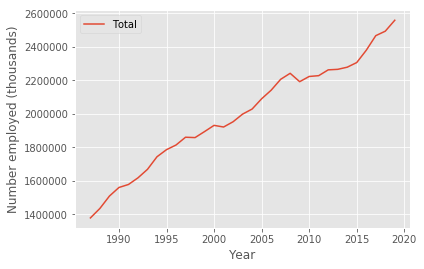

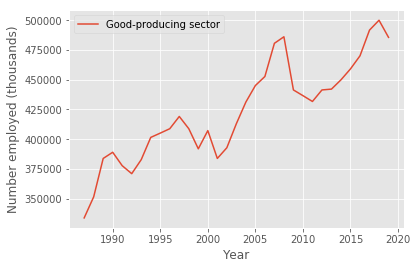

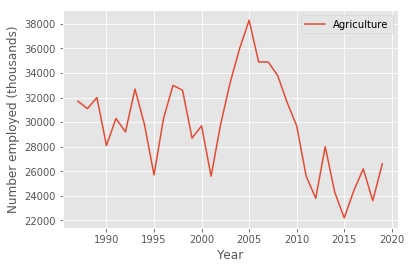

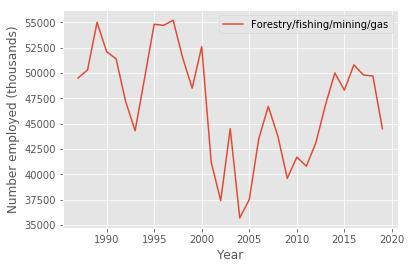

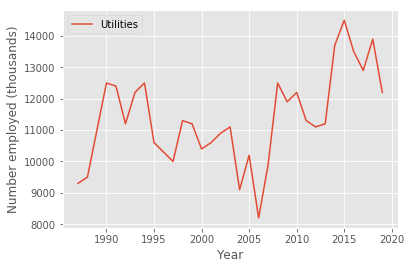

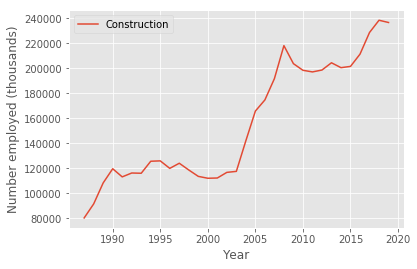

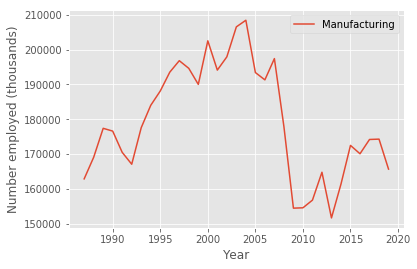

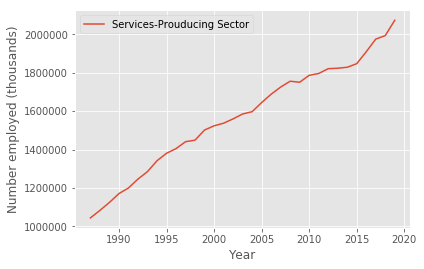

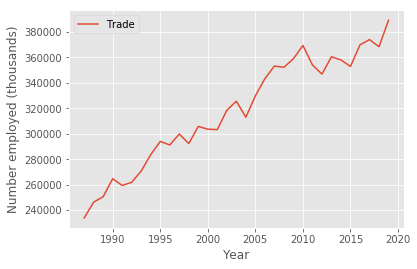

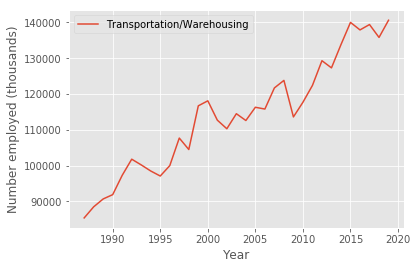

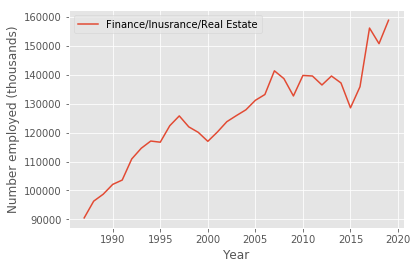

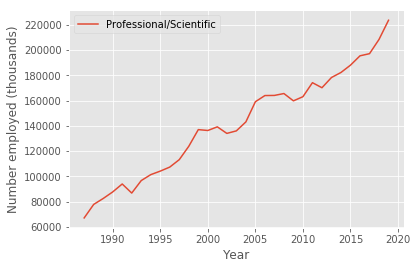

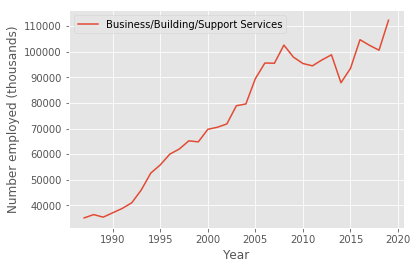

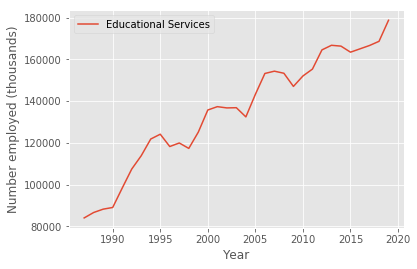

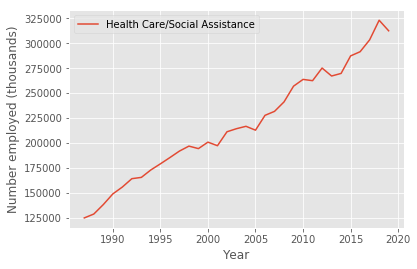

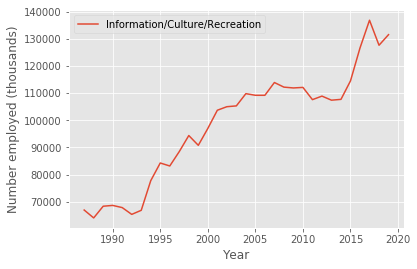

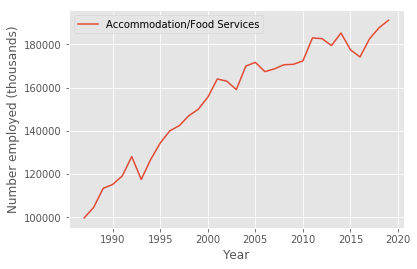

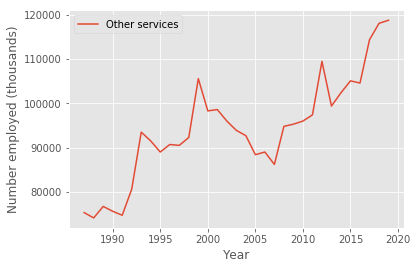

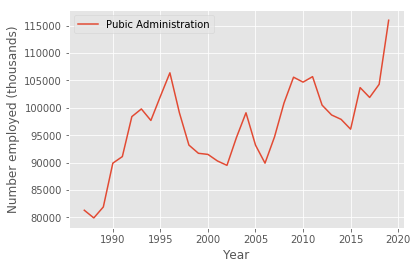

In [392]:
codes1 = ['0', '11,21,22,23,31,32,33', '1100  1129, 1151  1152', '1131  1142, 1153, 2100  2131', '2211  2213',
           '2361  2389', '3111  3399', '41 & over', '4111  4543', '4811  4931', '5211  5331', '5411  5419',
           '5511  5629', '6111  6117', '6211  6244', '5111  5191, 7111  7139', '7211  7225', '8111  8141',
           '9110  9191']
for ind in codes:
    plt.plot(range(1987, 2020), vc_industry[vc_industry['industry_code']==ind]['value'], label=sec_name[ind])
    plt.xlabel('Year')
    plt.ylabel('Number employed (thousands)')
    plt.legend()
    plt.show()